In [1]:
import sys
import datetime
import random
import matplotlib.pyplot as plt
import time
from matplotlib.pyplot import figure
import numpy as np

# AVL tree

In [2]:
class AVLTreeNode(object):
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
        #increase size of node
        self.value1 = key
        self.value2 = key
 
 
class AVLTree(object):
 
    def find(self, root, key):
        while root:
            if root.key == key:
                print("Found")
                break
            root = root.right if root.key < key else root.left
        return root
 
    def rangeSearch(self, root, k1, k2):
        if root is None:
            return
 
        if k1 < root.key :
            self.rangeSearch(root.left, k1, k2)
 
        if k1 <= root.key and k2 >= root.key:
            print(root.key, end=', '),
 
        if k2 > root.key:
            self.rangeSearch(root.right, k1, k2)
 
    # Function to insert a node
    def insert_node(self, root, key):
 
        # Find the correct location and insert the node
        if not root:
            return AVLTreeNode(key)
        elif key < root.key:
            root.left = self.insert_node(root.left, key)
        else:
            root.right = self.insert_node(root.right, key)
 
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
 
        # Update the balance factor and balance the tree
        balanceFactor = self.getBalance(root)
        if balanceFactor > 1:
            if key < root.left.key:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
 
        if balanceFactor < -1:
            if key > root.right.key:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
 
        return root
 
    # Function to delete a node
    def delete_node(self, root, key):
 
        # Find the node to be deleted and remove it
        if not root:
            return root
        elif key < root.key:
            root.left = self.delete_node(root.left, key)
        elif key > root.key:
            root.right = self.delete_node(root.right, key)
        else:
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp
            temp = self.getMinValueNode(root.right)
            root.key = temp.key
            root.right = self.delete_node(root.right,
                                          temp.key)
        if root is None:
            return root
 
        # Update the balance factor of nodes
        root.height = 1 + max(self.getHeight(root.left),
                              self.getHeight(root.right))
 
        balanceFactor = self.getBalance(root)
 
        # Balance the tree
        if balanceFactor > 1:
            if self.getBalance(root.left) >= 0:
                return self.rightRotate(root)
            else:
                root.left = self.leftRotate(root.left)
                return self.rightRotate(root)
        if balanceFactor < -1:
            if self.getBalance(root.right) <= 0:
                return self.leftRotate(root)
            else:
                root.right = self.rightRotate(root.right)
                return self.leftRotate(root)
        return root
 
    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
        return y
 
    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def getMinValueNode(self, root):
        if root is None or root.left is None:
            return root
        return self.getMinValueNode(root.left)
 
    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
            print(currPtr.key)
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)

In [3]:
myTree = AVLTree()
root = None
nums = [33, 13, 52, 9, 21, 61, 8, 11]
for num in nums:
    root = myTree.insert_node(root, num)
myTree.printHelper(root, "", True)
key = 13
root = myTree.delete_node(root, key)
print("After Deletion: ")
myTree.printHelper(root, "", True)
 
myTree.find(root, 21)
 
myTree.rangeSearch(root, 9, 39)

R----33
     L----13
     |    L----9
     |    |    L----8
     |    |    R----11
     |    R----21
     R----52
          R----61
After Deletion: 
R----33
     L----9
     |    L----8
     |    R----21
     |         L----11
     R----52
          R----61
Found
9, 11, 21, 33, 

# T tree

In [4]:
minSize = 2
maxSize = 1500
global globalId
globalId = 1

class TTreeNode(object):
    def __init__(self, key, parent):
        global globalId
        self.id = globalId
        globalId = globalId + 1
        self.parent = parent
        self.keys = [key]
        self.valueDict = {key : [key, key]}
        self.minKey = key
        self.maxKey = key
        self.left = None
        self.right = None
        self.height = 1

class TTree(object):
 
    def find(self, root, key):
        while root:
            if root.minKey <= key and key <= root.maxKey:
                if key in root.keys:
                    print("Found")
                else:
                    print("Not found")
                break
            root = root.right if root.maxKey < key else root.left
        return root
 
    def rangeSearch(self, root, k1, k2):
        if root is None:
            return
 
        if k1 < root.minKey :
            self.rangeSearch(root.left, k1, k2)
 
        if (k1 <= root.minKey and k1 >= root.minKey) or (k2 <= root.minKey and k2 >= root.minKey) or (k1 <= root.minKey and k2 >= root.maxKey):
            print(*list(filter(lambda k: k >= k1 and k <= k2, root.keys)), sep=" ", end=' ')
 
        if k2 > root.maxKey:
            self.rangeSearch(root.right, k1, k2)
 
 
    # Function to insert a node
    def new_insert_node(self, root, parent, key):
 
        newNode = None
 
        # Find the correct location and insert the node
        if not root:
            newNode = TTreeNode(key, parent)
            return (newNode, newNode)
 
        foundNode = self.search_bounding(root, key, False)
 
        if foundNode is not None:
            if len(foundNode.keys) < maxSize:
                foundNode.keys.append(key)
                foundNode.valueDict[key]=[key, key]
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
                return (root, newNode)
            else:
                foundNode.keys.append(key)
                foundNode.valueDict[key]=[key, key]
                foundNode.keys = foundNode.keys[1:]
                foundNode.keys.sort();
                removedMin = foundNode.minKey
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
                (foundNode.left, newNode) = self.new_insert_node(foundNode.left, foundNode, removedMin)
                key = removedMin
 
        foundNode.height = 1 + max(self.getHeight(foundNode.left),
                              self.getHeight(foundNode.right))
 
        return (root, newNode)
 
 
    def search_bounding(self, root, key, forDelete):
        if not root:
            return None
        elif root.minKey <= key and key <= root.maxKey:
            return root
        elif key < root.minKey:
            found = self.search_bounding(root.left, key, forDelete)
        elif key > root.maxKey:
            found = self.search_bounding(root.right, key, forDelete)
        if forDelete:
            return found
        if not found:
            return root
        else:
            return found
 
    # Function to delete a node
    def delete_node(self, root, key):
        foundNode = self.search_bounding(root, key, True)
        if foundNode is None:
            print('Value not found in tree')
            return
 
        foundNode.keys.remove(key)
        del foundNode.valueDict[key]
 
        if len(foundNode.keys) >= minSize:
            foundNode.keys.sort();
            foundNode.minKey = min(foundNode.keys)
            foundNode.maxKey = max(foundNode.keys)
 
            return None
 
        if foundNode.left is not None and foundNode.right is not None: #internal node
            glw = self.getGreatestLowerBound(foundNode.left)
 
            if glw is None:
                return None
 
            foundNode.keys.append(glw)
            foundNode.valueDict[glw]=[glw, glw]
            foundNode.keys.sort();
            foundNode.minKey = min(foundNode.keys)
            foundNode.maxKey = max(foundNode.keys)
 
        elif foundNode.left is None and foundNode.right is not None: #half-leaf node
            if len(foundNode.keys) + len(foundNode.right.keys) <= maxSize:
                foundNode.keys.extend(foundNode.right.keys)
                foundNode.valueDict.update(foundNode.right.valueDict)
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
 
                foundNode.right = None
                foundNode.height = 1
 
        elif foundNode.right is None and foundNode.left is not None: #half-leaf node
            if len(foundNode.keys) + len(foundNode.left.keys) <= maxSize:
                foundNode.keys.extend(foundNode.left.keys)
                foundNode.valueDict.update(foundNode.left.valueDict)
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
 
                foundNode.left = None
                foundNode.height = 1
 
        else:
            if len(foundNode.keys) > 0:
                foundNode.keys.sort();
                foundNode.minKey = min(foundNode.keys)
                foundNode.maxKey = max(foundNode.keys)
 
                return
            else:
                if foundNode.parent.right == foundNode:
                    parent = foundNode.parent
                    parent.right = None
                    foundNode = None
                else:
                    parent = foundNode.parent
                    parent.left = None
                    foundNode = None
 
        if foundNode:
            return self.balanceTree(foundNode, None)
        else:
            return self.balanceTree(parent, None)
 
    # Function to perform left rotation
    def leftRotate(self, z):
        y = z.right
        T2 = y.left
        y.left = z
        z.right = T2
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
 
 
        if z.parent and z.parent.left == z:
            z.parent.left = y
        elif z.parent:
            z.parent.right = y
 
 
 
        y.parent = z.parent
        z.parent = y
        if T2 is not None:
            T2.parent = z
 
        return y
 
    # Function to perform right rotation
    def rightRotate(self, z):
        y = z.left
        T3 = y.right
        y.right = z
        z.left = T3
        z.height = 1 + max(self.getHeight(z.left),
                           self.getHeight(z.right))
        y.height = 1 + max(self.getHeight(y.left),
                           self.getHeight(y.right))
 
        if z.parent and z.parent.left == z:
            z.parent.left = y
        elif z.parent:
            z.parent.right = y
 
        y.parent = z.parent
        z.parent = y
        if T3 is not None:
            T3.parent = z
        return y
 
    # Get the height of the node
    def getHeight(self, root):
        if not root:
            return 0
        return root.height
 
    # Get balance factore of the node
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)
 
    def getGreatestLowerBound(self, node):
        if node is None:
            return None
        if node.right is None:
            maxKey = node.maxKey
            node.keys.remove(maxKey)
            del node.valueDict[maxKey]
 
            if len(node.keys) == 0:
                if len(node.parent.right.keys) == 0:
                    node.parent.right = node.left
                    if node.left:
                        node.left.parent = node.parent
                        node.parent.height = node.parent.height - 1
                else:
                    node.parent.left = node.left
                    if node.left:
                        node.left.parent = node.parent
                        node.parent.height = node.parent.height - 1
            else:
                node.keys.sort();
                node.minKey = min(node.keys)
                node.maxKey = max(node.keys)
            return maxKey
        return self.getGreatestLowerBound(node.right)
 
 
    def balanceTree(self, node, parent):
        tempNode = node
        while node and node != parent:
            tempNode = node
            balanceFactor = self.getBalance(node)
            if balanceFactor > 1:
                if self.getBalance(node.left) >= 1:
                    node = self.rightRotate(node)
                else:
                    node.left = self.leftRotate(node.left)
                    if len(node.left.keys) < minSize:
                        node.left.keys, node.left.left.keys = node.left.left.keys, node.left.keys
                        node.left.valueDict, node.left.left.valueDict = node.left.left.valueDict, node.left.valueDict
                    node = self.rightRotate(node)
 
            elif balanceFactor < -1:
                if self.getBalance(node.right) <= -1:
                    node = self.leftRotate(node)
                else:
                    node.right = self.rightRotate(node.right)
                    node = self.leftRotate(node)
            else:
                node = node.parent
        return tempNode
 
    # Print the tree
    def printHelper(self, currPtr, indent, last):
        if currPtr != None:
            sys.stdout.write(indent)
            if last:
                sys.stdout.write("R----")
                indent += "     "
            else:
                sys.stdout.write("L----")
                indent += "|    "
#             parentPtr = 
            print(str(currPtr.keys))
            self.printHelper(currPtr.left, indent, False)
            self.printHelper(currPtr.right, indent, True)

In [5]:
myTree = TTree()

In [6]:
class DynamicHash:

    def __init__(self,dlugosc):
        self.table = [[] for _ in range(dlugosc)]


    def insert(self, key, value):
        hash_key = hash(key) % len(self.table)
        key_exists = False
        bucket = self.table[hash_key]
        for i, kv in enumerate(bucket):
            k, v = kv
            if key == k:
                key_exists = True 
                break
        if key_exists:
            bucket[i] = ((key, value))
        else:
            bucket.append((key, value))
        


    def delete(self, key):
        hash_key = hash(key) % len(self.table)	
        key_exists = False
        bucket = self.table[hash_key]
        for i, kv in enumerate(bucket):
            k, v = kv 
            if key == k:
                key_exists = True 
                break
        if key_exists:
            del bucket[i]
            print ('Key {} deleted'.format(key))
        else:
            print ('Key {} not found'.format(key))
            
    def search(self, key):
        hash_key = hash(key) % len(self.table)	
        bucket = self.table[hash_key]
        for i, kv in enumerate(bucket):
            k, v = kv
            if key == k:
                return v
            
    def search_multiple(self, from_key, end_key):
        table_all = []
        for i in range(from_key,end_key):
            table_all.append(self.search(i))
        print(table_all)

# Testy

## Szukanie pojedynczych wartości

In [7]:
def single_search_AVL_tree(input_data, search):
    myTree = AVLTree()
    root = None
    for num in input_data:
        root = myTree.insert_node(root, num)

    start = time.time_ns()
    
    for i in search:
        myTree.find(root, i)
        
    duration = time.time_ns() - start    

    return duration

In [8]:
def single_search_T_tree(input_data, search):
    myTree = TTree()
    root = None
    for num in input_data:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)
    
    start = time.time_ns()
    
    for i in search:
        myTree.find(root,i)
        
    duration = time.time_ns() - start
    
    return duration

In [9]:
def single_search_DynamicHash(input_data,search):
    g = DynamicHash(1000)
    
    for i in input_data:
        g.insert(i, '')
    
    start = time.time_ns()
    for i in search:
        g.search(i)
    duration = time.time_ns() - start
    return duration

## Szukanie przedziałowe

In [10]:
class SearchRange:
    def __init__(self, start, end):
        self.start = start
        self.end = end
    def __str__(self):
        return "start: "+ str(self.start) + ", end:" + str(self.end)

In [11]:
def range_search_AVL_tree(input_data, searchRange):
    myTree = AVLTree()
    root = None
    for num in input_data:
        root = myTree.insert_node(root, num)

    start = time.time_ns()
    
    for i in searchRange:
        myTree.rangeSearch(root, int(i.start), int(i.end))
        
    duration =time.time_ns() - start    

    return duration

In [12]:
def range_search_T_tree(input_data, searchRange):
    myTree = TTree()
    root = None
    for num in input_data:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)

    start = time.time_ns()
    
    for i in searchRange:
        myTree.rangeSearch(root, int(i.start), int(i.end))
        
    duration = time.time_ns() - start    

    return duration

In [13]:
def range_search_DynamicHash(input_data,searchRange):
    g = DynamicHash(1000)
    
    for i in input_data:
        g.insert(i, '')
    
    start = time.time_ns()
    for i in searchRange:
        g.search_multiple(int(i.start), int(i.end))
    duration = time.time_ns() - start
    return duration

### Wstawianie 

In [14]:
def add_to_AVL_tree(start,to_add):
    myTree = AVLTree()
    root = None
    for num in start:
        root = myTree.insert_node(root, num)
        
    start = time.time_ns()
    for i in to_add:
        root = myTree.insert_node(root, i)
    duration =time.time_ns() - start    

    return duration
    

In [15]:
def add_to_T_tree(start,to_add):
    myTree = TTree()
    root = None
    for num in start:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)

    start = time.time_ns()
    
    for num in to_add:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)
        
    duration = time.time_ns() - start    

    return duration

In [16]:
def add_DynamicHash(start,to_add):
    g = DynamicHash(1000)
    
    for i in start:
        g.insert(i, '')
    
    start = time.time_ns()
    for i in to_add:
        g.insert(i, '')
    duration = time.time_ns() - start
    return duration

## Usuwanie

In [17]:
def delete_AVL_tree(input_data, delete):
    myTree = AVLTree()
    root = None
    for num in input_data:
        root = myTree.insert_node(root, num)

    start = datetime.datetime.now()
    
    for i in delete:
        myTree.delete_node(root, i)
        
    duration = datetime.datetime.now() - start    

    return duration.microseconds

In [18]:
def delete_T_tree(input_data, delete):
    myTree = TTree()
    root = None
    for num in input_data:
        (root, newNode) = myTree.new_insert_node(root, None, num)
        if newNode:
            root = myTree.balanceTree(newNode, None)
    
    start = datetime.datetime.now()
    
    for i in delete:
        newRoot = myTree.delete_node(root, i)
        if newRoot:
            root = newRoot
        
    duration = datetime.datetime.now() - start

    return duration.microseconds

In [19]:
def delete_DynamicHash(input_data, delete):
    g = DynamicHash(1000)
    
    for i in input_data:
        g.insert(i, '')
    
    start = time.time_ns()
    for i in delete:
        g.delete(i)
    duration = time.time_ns() - start
    return duration

# TESTY

### Single

In [20]:
%%capture
x = []
avl = []
ttree = []
exthash = []
for i in range(10000,100000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    
    search = random.sample(input_data, int(i/10))#2000
    x.append(i)
    avl.append(single_search_AVL_tree(input_data,search))
    ttree.append(single_search_T_tree(input_data,search))
    exthash.append(single_search_DynamicHash(input_data,search))

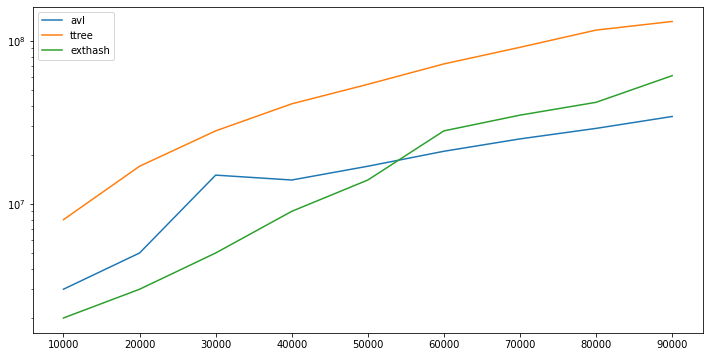

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, exthash, label = "exthash")
plt.legend()
plt.yscale('log')
plt.show()

### Range 10%

In [22]:
def gen_range(max_range,number_in_ranges,num):
    k=[]
    for i in range(0,num):
        tmp = random .randrange(max_range-number_in_ranges);
        k.append(SearchRange(tmp,tmp+number_in_ranges))
    return k
print(gen_range(100,95,10)[0])

start: 0, end:95


In [23]:
%%capture
x = []
avl = []
ttree = []
exthash = []
for i in range(20000,100000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    search = gen_range(i,i/10,10)
    x.append(i)
    avl.append(range_search_AVL_tree(input_data,search))
    ttree.append(range_search_T_tree(input_data,search))
    exthash.append(range_search_DynamicHash(input_data,search))

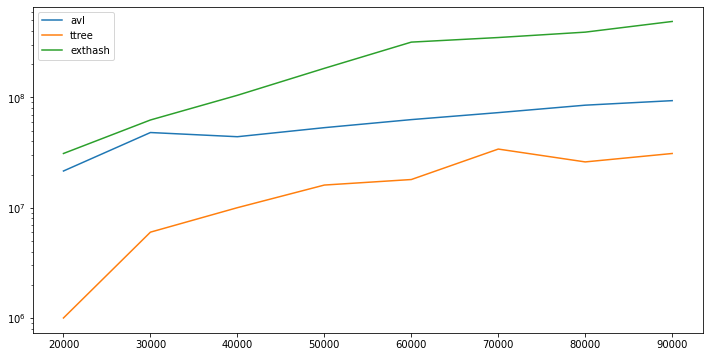

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, exthash, label = "exthash")
plt.legend()
plt.yscale('log')
plt.show()

### Range 5%-50%

In [25]:
%%capture
x = []
avl = []
ttree = []
exthash = []
for i in np.arange(0.05,0.51,0.05): #[13000]
    input_data = [j for j in range(0,50000)] 
    search = gen_range(50000,int(50000*i),5)
    x.append(i)
    avl.append(range_search_AVL_tree(input_data,search))
    ttree.append(range_search_T_tree(input_data,search))
    exthash.append(range_search_DynamicHash(input_data,search))

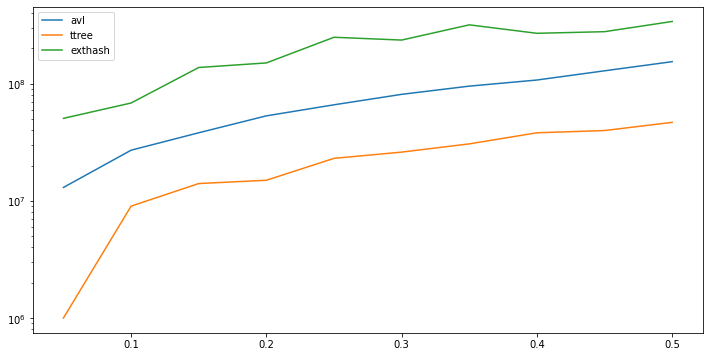

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, exthash, label = "exthash")
plt.legend()
plt.yscale('log')
plt.show()

### Insert

In [27]:
%%capture
x = []
avl = []
ttree = []
exthash = []
for i in range(20000,100000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    
    random.shuffle(input_data)
    k = int(len(input_data)*0.9)
    start = input_data[:k]
    to_add = input_data[k:]
    x.append(i)
    avl.append(add_to_AVL_tree(start,to_add))
    ttree.append(add_to_T_tree(start,to_add))
    exthash.append(add_DynamicHash(start,to_add))

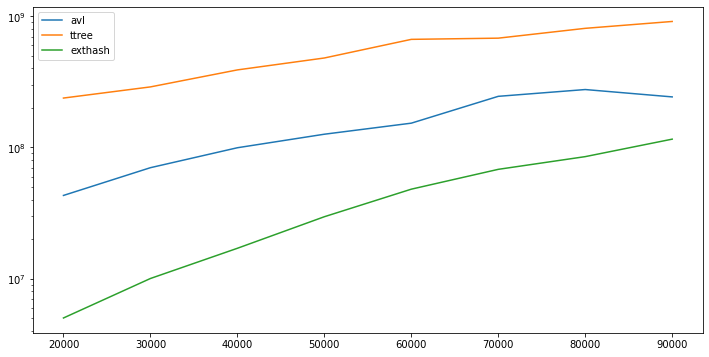

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, exthash, label = "exthash")
plt.legend()
plt.yscale('log')
plt.show()

### Delete 

In [29]:
%%capture
x = []
avl = []
ttree = []
exthash = []
for i in range(20000,100000,10000): #[13000]
    input_data = [j for j in range(0,i)] 
    delete_data = random.sample(input_data, int(len(input_data)/10))
    x.append(i)
    avl.append(delete_AVL_tree(input_data,delete_data))
    ttree.append(delete_T_tree(input_data,delete_data))
    exthash.append(delete_DynamicHash(input_data,delete_data))

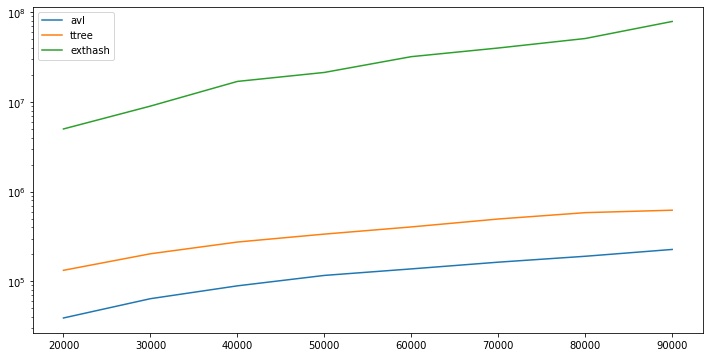

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(x,avl, label = "avl")
plt.plot(x, ttree, label = "ttree")
plt.plot(x, exthash, label = "exthash")
plt.legend()
plt.yscale('log')
plt.show()

# Brudnopis